# Sberbank Russia Housing Market
## Data Cleaning

In [61]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

pd.options.mode.chained_assignment=None

In [29]:
# Load the data
dataset=pd.read_csv('/Users/rudranimondal/Downloads/sberbank-russian-housing-market/train.csv')
dataset.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [31]:
print(dataset.shape)
print(dataset.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [62]:
# seperating numeric and non numeric columns
# numeric columns
df_n=dataset.select_dtypes(include=[np.number])
numeric_col=df_n.columns.values


In [63]:
# nonnumeric columns
df_nn=df.select_dtypes(exclude=[np.number])
non_numeric_col=df_nn.columns.values


### 1. Missing data

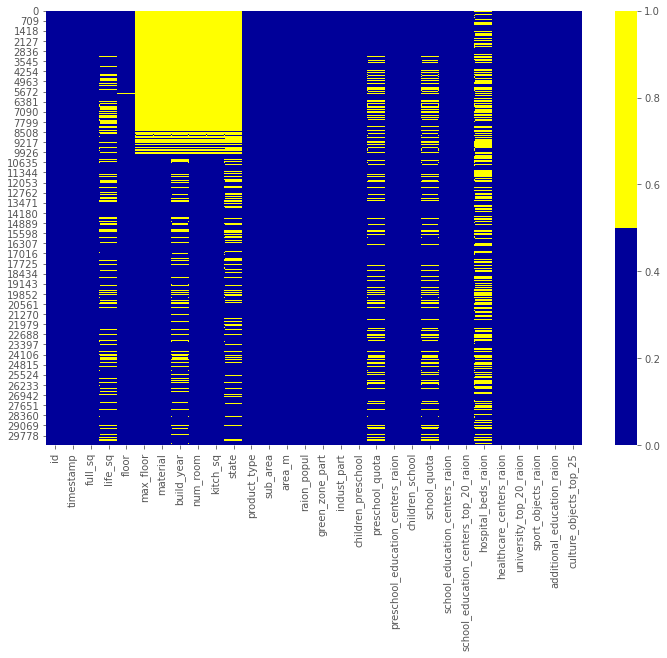

In [34]:
# Technique 1 using heatmap
cols=dataset.columns[:30] # upto 30 featurs(columns)
colors=['#000099','#ffff00']
sns.heatmap(dataset[cols].isnull(),cmap=sns.color_palette(colors))

In [36]:
# Technique 2 making percentage
for col in dataset.columns:
    pic_missing=np.mean(dataset[col].isnull())
    print("{} - {}".format(col,round(pic_missing*100)))

id - 0.0
timestamp - 0.0
full_sq - 0.0
life_sq - 21.0
floor - 1.0
max_floor - 31.0
material - 31.0
build_year - 45.0
num_room - 31.0
kitch_sq - 31.0
state - 44.0
product_type - 0.0
sub_area - 0.0
area_m - 0.0
raion_popul - 0.0
green_zone_part - 0.0
indust_part - 0.0
children_preschool - 0.0
preschool_quota - 22.0
preschool_education_centers_raion - 0.0
children_school - 0.0
school_quota - 22.0
school_education_centers_raion - 0.0
school_education_centers_top_20_raion - 0.0
hospital_beds_raion - 47.0
healthcare_centers_raion - 0.0
university_top_20_raion - 0.0
sport_objects_raion - 0.0
additional_education_raion - 0.0
culture_objects_top_25 - 0.0
culture_objects_top_25_raion - 0.0
shopping_centers_raion - 0.0
office_raion - 0.0
thermal_power_plant_raion - 0.0
incineration_raion - 0.0
oil_chemistry_raion - 0.0
radiation_raion - 0.0
railroad_terminal_raion - 0.0
big_market_raion - 0.0
nuclear_reactor_raion - 0.0
detention_facility_raion - 0.0
full_all - 0.0
male_f - 0.0
female_f - 0.0
you

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

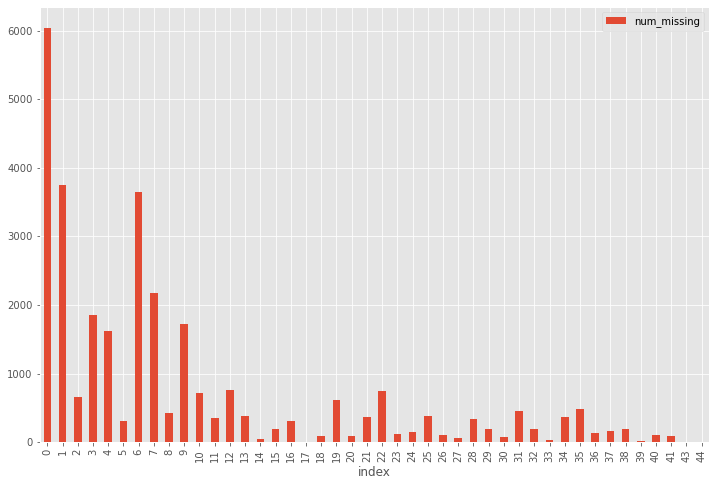

In [37]:
# Techinque 3 histrogram 
for col in dataset.columns:
    missing=dataset[col].isnull()
    num_missing=np.sum(missing)
    
    if num_missing>0:
        print('created missing indicator for: {}'.format(col))
        dataset['{}_ismissing'.format(col)]=missing
ismissing_cols = [col for col in dataset.columns if 'ismissing' in col]
dataset['num_missing'] = dataset[ismissing_cols].sum(axis=1)

dataset['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
        

In [38]:
dataset.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,6


### 2. What to do with missing data

In [42]:
# 1 Solution: Drop the observation
missing_rows=dataset[dataset['num_missing']>35].index
df_missing_rows=dataset.drop(missing_rows,axis=0)
# size of missing rows data
df_missing_rows.shape

(29779, 344)

In [43]:
# actual size of dataset
dataset.shape

(30471, 344)

In [46]:
# 2 solution: Drop the feature columns
col_to_drop=['hospital_beds_raion']
df_missing_col=dataset.drop(col_to_drop,axis=1)
df_missing_col.shape

(30471, 343)

In [47]:
dataset.shape

(30471, 344)

In [48]:
# 3 Solution: Inpute the missing
# When missing value is numeric we can repalce missing value with median or average
# When missing value is catagorical we can replace with mode(most fequent value)
med=dataset['life_sq'].median()
print(med)
dataset['life_sq']=dataset['life_sq'].fillna(med)

30.0


In [50]:
dataset['life_sq'][:]

0        27.0
1        19.0
2        29.0
3        50.0
4        77.0
         ... 
30466    27.0
30467    59.0
30468    30.0
30469    32.0
30470    28.0
Name: life_sq, Length: 30471, dtype: float64

In [51]:
# We can impute this stragegy with all numeric features
df_numeric=dataset.select_dtypes(include=[np.number])
num_cols=df_numeric.columns.values

for col in num_cols:
    missing=dataset[col].isnull()
    num_missing=np.sum(missing)
    
    if num_missing>0:
        print('impute missing value for: {}'.format(col))
        dataset['{}_ismissing'.format(col)]=missing
        med=dataset[col].median()
        dataset[col]=dataset[col].fillna(med)

impute missing value for: floor
impute missing value for: max_floor
impute missing value for: material
impute missing value for: build_year
impute missing value for: num_room
impute missing value for: kitch_sq
impute missing value for: state
impute missing value for: preschool_quota
impute missing value for: school_quota
impute missing value for: hospital_beds_raion
impute missing value for: raion_build_count_with_material_info
impute missing value for: build_count_block
impute missing value for: build_count_wood
impute missing value for: build_count_frame
impute missing value for: build_count_brick
impute missing value for: build_count_monolith
impute missing value for: build_count_panel
impute missing value for: build_count_foam
impute missing value for: build_count_slag
impute missing value for: build_count_mix
impute missing value for: raion_build_count_with_builddate_info
impute missing value for: build_count_before_1920
impute missing value for: build_count_1921-1945
impute missi

In [53]:
# We dont have categoical value, yet we can apply mode strategy 
df_non=dataset.select_dtypes(exclude=[np.number])
non_num_cols=df_non.columns.values

for col in non_num_cols:
    missing=dataset[col].isnull()
    non_num=np.sum(missing)
    
    if non_num>0:
        print('impute missing value: {}'.format(col))
        dataset['{}_ismissing'.format(col)]=missing
        
        top=dataset[col].describe()['top']
        dataset[col]=dataset[col].fillna(top)

In [54]:
# 4 solution: Replace the missing 
# For catagorical
dataset['sub_area']=dataset['sub_area'].fillna('_MISSING_')
# For numeric
dataset['life_sq']=dataset['life_sq'].fillna(-999)

### 3. Irregular data(Outliers)

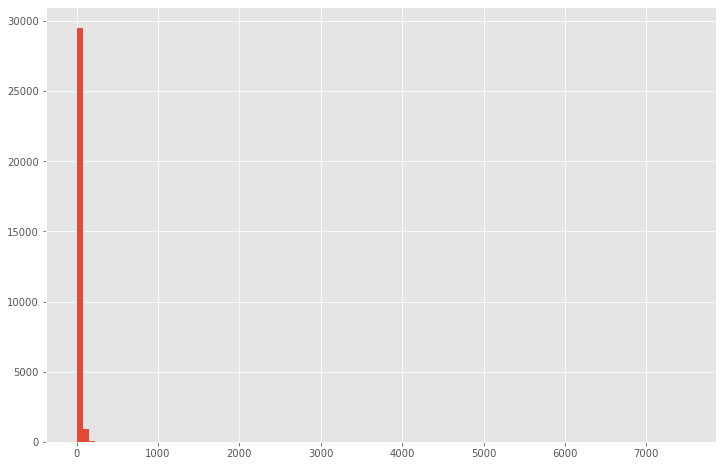

In [57]:
# Outliers are differnt from other observations
# Techique 1 : Histogram/Box plot
dataset['life_sq'].hist(bins=100)

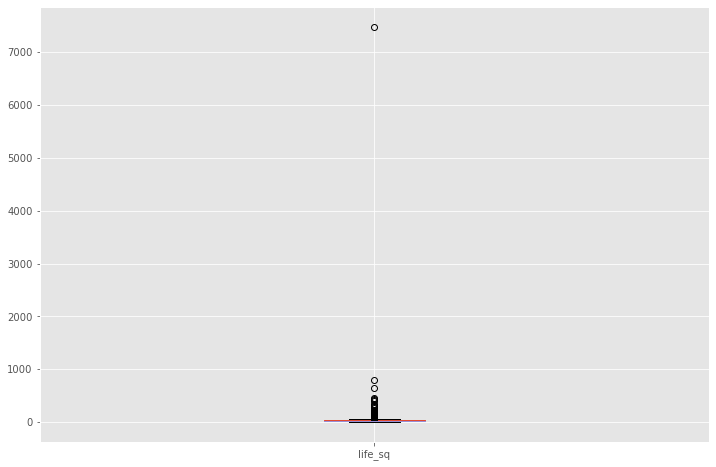

In [58]:
# Box plot
dataset.boxplot(column=['life_sq'])

In [59]:
# Techique 2: Descritive Statistic
dataset['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

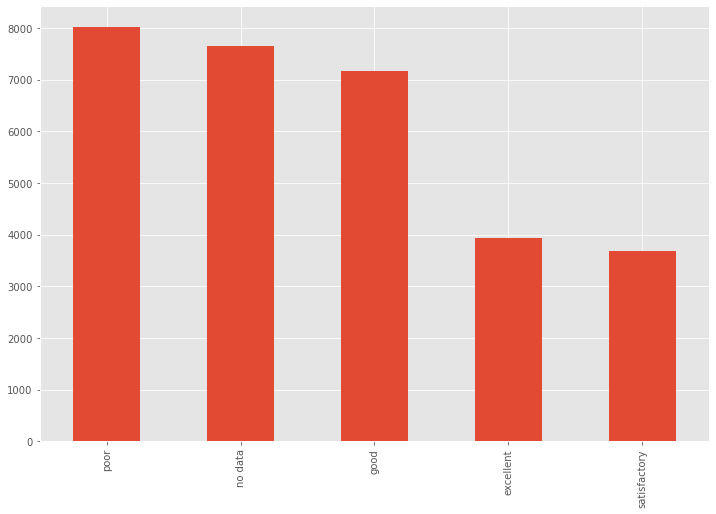

In [60]:
# Techique 3: Bar plot
dataset['ecology'].value_counts().plot.bar()

### 4. Unnecessary data


In [69]:
# Unnecessary type 1: Uninformative / Repetitive
num_rows=len(dataset.index)
low_information_col=[]

for col in dataset.columns:
    cnts=dataset[col].value_counts(dropna=False)
    top_pct=(cnts/num_rows).iloc[0]
    
    if top_pct>0.95:
        low_information_col.append(col)
        print('{0}: {1:.5f}%'.format(col,top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

In [71]:
# Duplicates : All features based
df_dedupped=dataset.drop('id',axis=1).drop_duplicates()
print(dataset.shape)
print(df_dedupped.shape)
dataset.head()

(30471, 344)
(30461, 343)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,6


In [73]:
# Duplicates: Key features based
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

dataset.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

In [75]:
# We have 16 dublicates so what to do next
# we can drop the duplicates based on key features
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_duplicates2=dataset.drop_duplicates(subset=key)
print(dataset.shape)
print(df_duplicates2.shape)

(30471, 344)
(30455, 344)


### 5.Inconsistent data

In [76]:
# Inconsistent type 1: Capitalization
dataset['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [77]:
# we can change is to lower case
dataset['sub_area_lower']=dataset['sub_area'].str.lower()
dataset['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie kievskij                   2
poselenie shhapovskoe                2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

In [78]:
# Inconsistent type 2: format
dataset

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,9,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,7,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,basmannoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,1,otradnoe
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,0,tverskoe
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,False,False,False,False,False,False,False,False,21,poselenie vnukovskoe
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,0,obruchevskoe


In [80]:
# We can convert the date and time
dataset['timestamp_dt'] = pd.to_datetime(dataset['timestamp'], format='%Y-%m-%d')
dataset['year'] = dataset['timestamp_dt'].dt.year
dataset['month'] = dataset['timestamp_dt'].dt.month
dataset['weekday'] = dataset['timestamp_dt'].dt.weekday

print(dataset['year'].value_counts(dropna=False))
print()
print(dataset['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


In [82]:
# Inconsistent type 3: Addresses
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [83]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
